<p style="font-size: 30px; line-height: 135%;}">
<b>1 Tipos de fronteras en clasificación</b>
</p>

In [1]:
#Bloque para importar las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#==========================================================
#Definición de los 2 conjuntos de datos a utilizar
#==========================================================
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta a</b>
</p>

Cantidad de elementos de la primera clase (Azul): 520
Cantidad de elementos de la segunda clase (Roja): 480


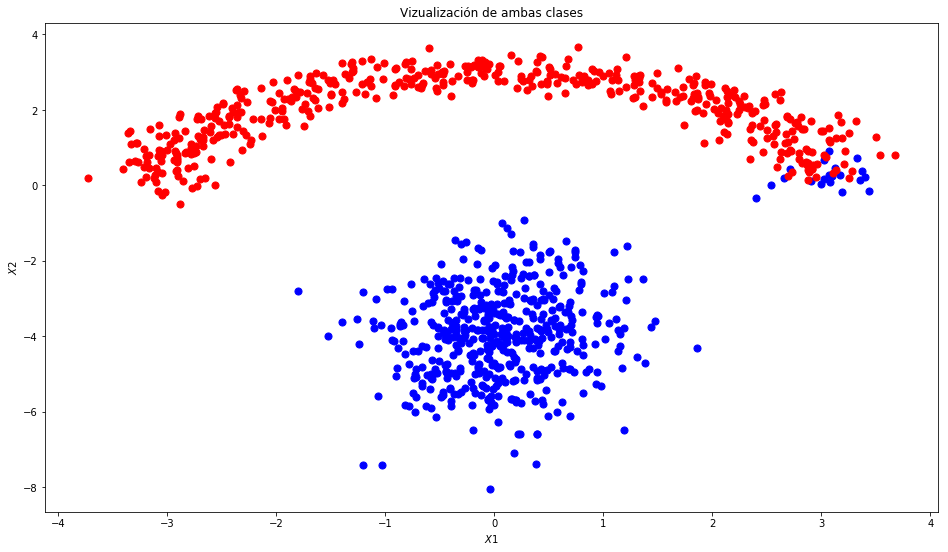

In [3]:
#Ejercicio A
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n) 
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
#Y es un vector que contiene a que clase pertenece cada medición

print("Cantidad de elementos de la primera clase (Azul):",len(y1))
print("Cantidad de elementos de la segunda clase (Roja):",len(y2))

plt.figure(figsize = (16, 9))
plt.scatter(X[:,0][:len(y1)+1], X[:,1][:len(y1)+1], s=50, c = "blue")
plt.scatter(X[:,0][len(y1)+1:], X[:,1][len(y1)+1:], s=50, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.title("Vizualización de ambas clases")
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b>
El primer conjunto tendrá 500+n elementos, mientras que el segundo conjunto tendrá 500-n elementos. Para este caso en particular el conjunto azul tendrá 520 elementos, mientras que el rojo tendrá 480 elementos.

</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta b</b>
</p>

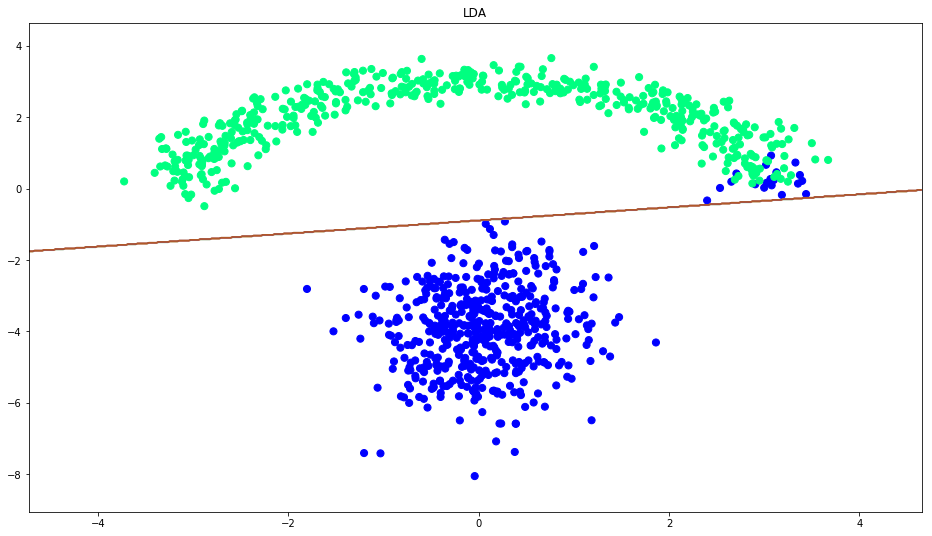

In [4]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(16,9))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
modelLDA = LDA()
modelLDA.fit(X,y)
visualize_border(modelLDA,X,y,"LDA")

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b>
Se observa una recta horizontal que separa a ambas clases, esta recta tiene una pendiende positiva dado que al hacer el shift algunos elementos de la clase azul quedaron a la derecha del anillo.</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta c</b>
</p>

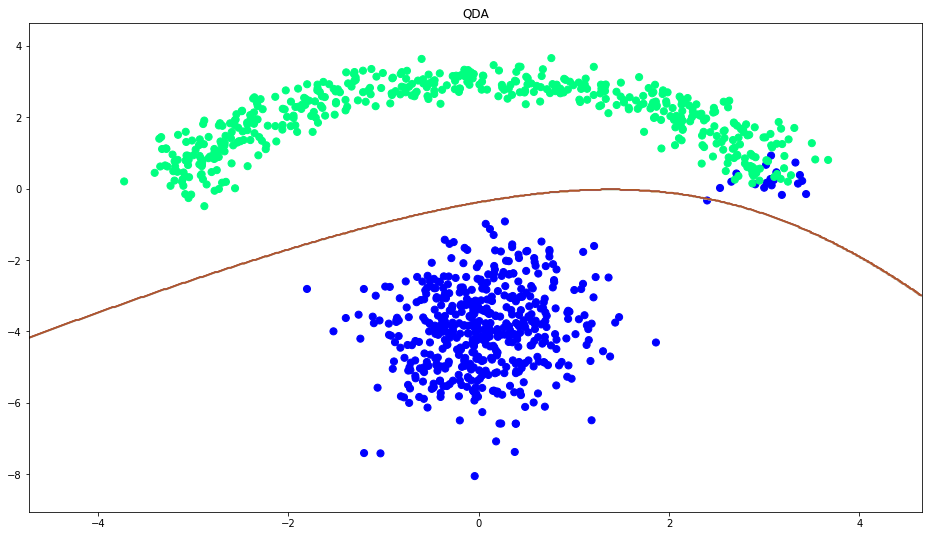

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
modelQDA = QDA()
modelQDA.fit(X,y)
visualize_border(modelQDA,X,y,"QDA")

<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> Se aprecia que la frontera ahora es una curva cuadrática, esta es concava puesto que la grán mayoria de los datos de la clase azul se encuentrán agrupados abajo. Comparado con LDA ahora datos que antes caian en los extremos (izquierda y derecha) ahora serán clasificados en la clase de la 'semi-luna'. Otro cambio es que datos que caian en el medio en LDA eran clasificados como 'semi-luna', pero en QDA ahora corresponden a la clase azul.
<br><br>

Tanto LDA como QDA asumen distribuciones normales multivariadas sobre las clases, pero QDA se diferencia en que NO asume que la covarianza de las clases son iguales.</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta d</b>
</p>

In [6]:
#Letra D
from sklearn.metrics import accuracy_score
y_pred = modelLDA.predict(X)
y_true = y

#Buscamos los que fueron mal clasificados en LDA
mal_clasificadosLDA = list()
dif = y_true-y_pred
for i in range(len(dif)):
    if dif[i]!=0:
        mal_clasificadosLDA.append(i)
    
a = 1-accuracy_score(y_true, y_pred)
print("[LDA] Miss Classification Loss: %f"%(a))
y_pred = modelQDA.predict(X)
b = 1-accuracy_score(y_true, y_pred)

#Buscamos los que fueron mal clasificados en QDA
mal_clasificadosQDA = list()
dif = y_true-y_pred
for i in range(len(dif)):
    if dif[i]!=0:
        mal_clasificadosQDA.append(i)
        
print("[QDA] Miss Classification Loss: %f"%(b))
print("Diferencia",abs(a-b))

[LDA] Miss Classification Loss: 0.020000
[QDA] Miss Classification Loss: 0.019000
Diferencia 0.001


<p style="font-size: 18px; line-height: 135%;}">
<b>d)</b> Al ver la métrica se aprecia que LDA comete más errores que QDA, estos presentan diferencias del orden de $10^{-3}$ lo cual es despreciable, así que para este caso se comportan casí igual</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta e</b>
</p>

In [7]:
from ipywidgets import interactive, fixed
def visualize_border_interactive(param, func):
    model = func(param)
    visualize_border(model,X,y)

from sklearn.linear_model import LogisticRegression as LR
def train_modelLR(param):
    model=LR() #define your model
    
    #Dado que en la implementación el parámetro C es el inverso de lambda, a la función se le ingresará 1/C
    model.set_params(C=1/param,penalty='l2') 
    
    model.fit(X,y)
    return model

p_min = 0.01 #define your range
p_max = 100 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max), func = fixed(train_modelLR))

A Jupyter Widget

<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> 
Al ver la documentación de la implementación de la regresión logistica se sabe que el parámetro $C$ es el inverso del parámetro de regularización $\lambda$, por lo tanto al momento de ocupar el widget lo que se le ingresa al modelo como parámetro $C$ es $1/ \textit{param}$.
<br><br>

El parámetro $\lambda$ como todo regularizador tiene como objetivo de mejorar el poder de generalización de la máquina, valores pequeños de $\lambda$ relajan el grado de penalización, mientras que valores más grandes de $\lambda$ agraban el nivel de penalización.
<br><br>

Partiendo desde $\lambda=1$ se aprecia una recta con pendiente positiva, en la media que se agrandan los valores de $\lambda$ la pendiente se va haciendo más horizontal. Esto se explica ya que al aumentar el nivel de penalización de la norma-2 la recta que va minimizando la distancia a los puntos es una más horizontal dado que está reduce la distancia de los puntos de la parte izquierda de la semi-luna.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta f</b>

</p>

In [8]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_modelSVM_L(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 0.01 #define your range
p_max = 30 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max), func = fixed(train_modelSVM_L))

A Jupyter Widget

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b> 
Valores pequeños del parámetro de regularización $\lambda$ hacen que la máquina pueda permitir más violaciones a la restricción del margen en el problema de optimización, en la medida que se aumenta el valor de $\lambda$ se penalizan más estas violaciones haciendo que eventualmente la máquina decida ir por un hyper plano que no viole estas. 
<br><br>

Lo anteriormente descrito se aprecia al variar los valores de $\lambda$. Al usar valores de $\lambda$ pequeños, por ejemplo con $\lambda = 0,01$ el hyper plano generado ignora completamente los elementos generados con el shift con el fin de generar el mejor margen (el mayor menor margen) posible. En cambio al usar valores más elevados los elementos del shift no son ignorados, entonces, el plano generado deja estos elementos en el lado que corresponde y se acerca a los puntos pertenecientes a la semi-luna. 
<br><br>
Es importante destacar que llega un punto en que se "estanca" el plano en la medida que va subiendo dado que no puede seguir sacando los elementos shifteados de la región de la clase de semi-luna dado que ello implicaria mal calificar los elementos de la semi-luna como la clase azul.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta g</b>

</p>

In [9]:
def train_modelSVM_rbf(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

p_min = 0.005 #define your range
p_max = 100 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max), func = fixed(train_modelSVM_rbf))

A Jupyter Widget

In [10]:
def train_modelSVM_poly(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model

p_min = 0.005 #define your range
p_max = 100 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max), func = fixed(train_modelSVM_poly))

A Jupyter Widget

<p style="font-size: 18px; line-height: 135%;}">
<b>g)</b> 
Al igual que como se dijo anteriormente, menores valores de $\lambda$ permitiran generar mayores margenes ignorando elementos y a mayores valores de $\lambda$ se generarán fronteras que privilegiarán separar los elementos.
<br><br>

Usando el kernel rbf (squared exponential kernel), se aprecia que al permitir violaciones ser genera una frontera circular sobre la acumulación central de puntos de la clase azul. Una vez que aumenta el $\lambda$ ya no se desprecian los elementos shifteados sobre la semi-luna, entonces, se genera una nueva frontera que empieza a encerrar la semi-luna en la medida que aumenta el $\lambda$, esto se debe a que la frontera intenta dejar afuera los puntos shifteados en la semi-luna.

<br><br>

En relación al kernel polinomial se aprecia que este puede definir fronteras más libres, no sólo rectas, pero, en la medida que se aumenta el parámetro de regularización $\lambda$ la frontera se va haciendo más similar a una recta dado que se quiere mal clasificar ningún punto del entrenamiento.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta h</b>

</p>

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_modelTree(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 20 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max), func = fixed(train_modelTree))

A Jupyter Widget

<p style="font-size: 18px; line-height: 135%;}">
<b>h)</b> 

El parámetro de máxima profundidad en el árbol es el cual delimita la máxima profundidad a la que pueden llegar las hojas, por lo tanto, delimita el número de nodos internos y nodos hojas posibles.

<br><br>

Al ocupar valores pequeños de este parámetro se generan fronteras más simples. Esto se produce pues hay menos nodos internos lo que se traduce en menos reglas de decisión. Por ejemplo al poner el parámetro 1 se aprecia una recta horizontal que divide ambas regiones, esto se debe a que sólo hay una regla de decisión establecida sobre el parámetro $X2$.

<br><br>

En la medida que se aumenta el parámetro se van generando fronteras más complicadas puesto que hay más disponibilidad de reglas, aunque, llega un punto en el cual no varia la frontera, esto se explica por 2 posibles razones. La primera es que al particionar tanto las regiones se llega a regiones que no satisfacen el criterio de elementos mínimos (2 por default). La segunda posible razón se explica por el parámetro <i><b>min_impurity_decrease</b></i>, las nuevas particiones deben de decrementar la impuresa del nodo actual como mínimo en la cantidad establecida en el parámetro, en caso de que no lo cumplan el nodo no se particiona y queda como hoja.


</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 1, pregunta i</b>

</p>

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def train_modelKNN(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 31 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max,2), func = fixed(train_modelKNN))

A Jupyter Widget

<p style="font-size: 18px; line-height: 135%;}">
<b>i)</b> 
El algoritmo de calsificación K-NN significa los K-esimos vecinos más cercanos, lo que hace este algoritmo es que cuando llega un punto a clasificar a este se le buscan los $K$ vecinos más cercanos y se le clasifica según la moda de los K más cercanos. 

<br><br>

El parámetro que se está modificando es $K$, este parámetro es la cantidad de vecinos que está consideran el algoritmo. Como regla general este parámetro NO debe ser multiplo de la cantidad de clases debido a que un punto a clásificar podría quedar en empate al ver la moda, entonces, para este problema hay que ocupar valores de $K$ que sean impares.
<br><br>

Se aprecia que en la medida que se aumenta el número de vecinos $K$ en la parte superior derecha, la frontera definina va desplazandose hacía abajo, esto se debe a que en esa área la mayor cantidad de vecinos para un punto a clasificar es de la clase de semi-luna, entonces en la medida que se le permite considerar más vecinos el número de vecinos de la semi-luna sobrepasará a los elementos shifteados.
</p>